In [183]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task3-aqi.ipynb")

# Task 3: Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County

This task covers topics on the lesson on [time series](https://meds-eds-220.github.io/MEDS-eds-220-course/book/chapters/lesson-7-time-series.html). 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/meganhessel/eds220-hwk2-Hessel.git


- Review the [complete rubric for this task](https://docs.google.com/document/d/131OnUDOLpOl94SlaMU9nGqT998ABrjFS/edit?usp=sharing&ouid=111507336322611936333&rtpof=true&sd=true) before starting.

- **Make at least 5 commits. Generally, commit every time you finish a major step.** We'll check your repository and view the commit history.

- **Add comments for all your code.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County. 

## FINAL CODE

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

## 1

a. Read the [Air Quality Index (AQI) Basics](https://www.airnow.gov/aqi/aqi-basics/) from the AirNow.gov portal.

b. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 

c. Under "Donwload Data", click on "Pre-generated Data Files".

d. Read the "About the data" section.

## 2
a. Back in the "Pre-generated Data Files" site, click on "Tables of Daily AQI".

b. Copy the URL to the 2017 Daily AQI **by County** ZIP file `daily_aqi_by_county_2017.zip`

Notice we'll be reding the data directly from its ZIP file link. This ZIP file contains a single CSV that has been compressed to save space. 

<!-- BEGIN QUESTION -->

c. In the next code cell read in the data from the URL using the [`pd.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function with the `compression='zip'` parameter added and store it as `aqi_17`. 

d. In the same cell, read in the data for the 2018 Daily AQI by County ZIP file and store it as `aqi_18`.

In [184]:
# import libraries 
import pandas as pd 
import numpy as np

In [185]:
# Read in data
URL2017 = "https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip"
URL2018 = "https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip"

aqi_17 = pd.read_csv(URL2017, compression='zip')
aqi_18 = pd.read_csv(URL2018, compression='zip')

<!-- END QUESTION -->

## 3
a. and b. Use the next two code cells to look at the head of both data frames. Store your results in `aqi_17_head` and `aqi_18_head`. 

In [186]:
# a.
aqi_17_head = aqi_17.head()

In [187]:
# b.
aqi_18_head = aqi_18.head()

In [188]:
grader.check("q3_a")

q3_a results: All test cases passed!

<!-- BEGIN QUESTION -->

c. Use this code cell to make some other preliminary data exploration of your choosing.

In [189]:
aqi_17.dtypes
aqi_17.shape
aqi_17.isna().sum()

State Name                   0
county Name                  0
State Code                   0
County Code                  0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Defining Site                0
Number of Sites Reporting    0
dtype: int64

In [190]:
aqi_18.dtypes
aqi_18.shape
aqi_18.isna().sum()

State Name                   0
county Name                  0
State Code                   0
County Code                  0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Defining Site                0
Number of Sites Reporting    0
dtype: int64

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

d. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

dtypes - Let's you look at all the columns: their names + type (off the bat, data is an object instead of a datetime)
shape - Gives you diminstions... We have lots of rows in these dataframes (dif # of rows in 2017 vs 2018)
isna().sum() - Gives you number of NA values in each column 

<!-- END QUESTION -->

## 4
We currently have two separate data frames. For this exercise we will need to "glue" them one on top of the other. The `pandas` function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

NOTE: When we concatenate data frames like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the mismatch between the index of `aqi` and the number of rows i the complete data frame.


In [191]:
# "Glueing" 2017 and 2018 together with pd.concat()
aqi = pd.concat([aqi_17, aqi_18])
aqi

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
327536,Wyoming,Weston,56,45,2018-12-27,36,Good,Ozone,56-045-0003,1
327537,Wyoming,Weston,56,45,2018-12-28,35,Good,Ozone,56-045-0003,1
327538,Wyoming,Weston,56,45,2018-12-29,35,Good,Ozone,56-045-0003,1
327539,Wyoming,Weston,56,45,2018-12-30,31,Good,Ozone,56-045-0003,1


In [192]:
grader.check("q4")

q4 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 5

Run the following code cell and use the next markdown cell to give a line by line explanation of the code below the comment "#Simplify column names". You might need to look up the `pandas` documentation.

In [193]:
# Initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n') # printing column as they are 

# Simplify column names
aqi.columns = (aqi.columns # Editing and accessing all columns names
                  .str.lower() # Making all lowercase 
                  .str.replace(' ','_') # Replacing spaces with "_"
                )

print(aqi.columns, '\n') # Printing "fixed" column names 

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



In [194]:
# Actually changing the column names in the dataframe 
aqi_17.columns = (aqi_17.columns # Editing and accessing all columns names
                  .str.lower() # Making all lowercase 
                  .str.replace(' ','_')) # Replacing spaces with "_"
                
aqi_18.columns = (aqi_18.columns # Editing and accessing all columns names
                  .str.lower() # Making all lowercase 
                  .str.replace(' ','_')) # Replacing spaces with "_"

In [195]:
# Initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
print(aqi.columns, '\n')

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



(^^^ Idk why, I can't edit that cell you gave)

<!-- END QUESTION -->

## 6
In the next code cell:

a. Select only data from `Santa Barbara` county and store it in a new variable `aqi_sb`.

b. Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`.

Your dataframe should have the following columns in this order: `date`, `aqi`, `category`, `defining_parameter`, `defining_stie`, `number_of_sites_reporting`. 

In [216]:
aqi_sb = aqi_sb[aqi_sb['county_name'] == "Santa Barbara"].drop(columns = ['state_name', 'county_name', 'state_code', 'county_code'])
aqi_sb

KeyError: 'county_name'

In [197]:
grader.check("q6a")

q6a results: All test cases passed!

 
c. What is the data type of the `date` column? Write your answer in the markdown cell below. 

Data is stored as an object rightnow :(

*Your answer here.*

In [198]:
aqi_sb.dtypes

date                         object
aqi                           int64
category                     object
defining_parameter           object
defining_site                object
number_of_sites_reporting     int64
dtype: object

<!-- BEGIN QUESTION -->

## 7
In the following cell:
1. Update the date column of `aqi_sb` to be a `pandas.datetime` object.
2. Update the index of `aqi_sb` to be the `date` column.

In [199]:
aqi_sb.dtypes

date                         object
aqi                           int64
category                     object
defining_parameter           object
defining_site                object
number_of_sites_reporting     int64
dtype: object

In [200]:
# Change data column to a datetime type 
aqi_sb['date'] = pd.to_datetime(aqi_sb['date'])

In [201]:
# Set index as date 
aqi_sb.set_index('date', inplace = True)

In [202]:
aqi_sb

,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
date,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12
2017-01-02,39,Good,PM2.5,06-083-2011,11
2017-01-03,71,Moderate,PM10,06-083-4003,12
2017-01-04,34,Good,Ozone,06-083-4003,13
2017-01-05,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...
2017-12-27,62,Moderate,PM2.5,06-083-0011,12
2017-12-28,54,Moderate,PM2.5,06-083-0011,12
2017-12-29,49,Good,PM2.5,06-083-0011,12


<!-- END QUESTION -->

## 8
In the next cell we will calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) using the `rolling()`method for `pandas.Series`:

- `rolling()` is a lazy method, so we need to specify what we want to calculate over each window before it does something. 
- in this example we use the aggregator function `mean()` to calculate the average over each window
- the parameter '5D' indicates we want the window for our rolling average to be 5 days. 
- we get a `pandas.Series` as ouput

Store your answer in the `rolling_average` variable. You should have two columns in your series, `date` and the averages. 

In [203]:
# Calculate AQI rolling average over 5 days

rolling_average = pd.DataFrame(aqi_sb['aqi'].rolling('5D').mean())
#rolling_average = aqi_sb['aqi'].rolling('5D').mean()

rolling_average 

,aqi
date,
2017-01-01,39.000000
2017-01-02,39.000000
2017-01-03,49.666667
2017-01-04,45.750000
2017-01-05,44.000000
...,...
2017-12-27,57.000000
2017-12-28,58.600000
2017-12-29,57.000000


In [204]:
grader.check("q8")

q8 results:
    q8 - 1 result:
        ❌ Test case failed
        Trying:
            pd.testing.assert_frame_equal(pd.read_csv('data/t3_q8_df.csv', index_col='date', parse_dates=True), pd.DataFrame(rolling_average))
        Expecting nothing
        **********************************************************************
        Line 1, in q8 0
        Failed example:
            pd.testing.assert_frame_equal(pd.read_csv('data/t3_q8_df.csv', index_col='date', parse_dates=True), pd.DataFrame(rolling_average))
        Exception raised:
            Traceback (most recent call last):
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q8 0[0]>", line 1, in <module>
                pd.testing.assert_frame_equal(pd.read_csv('data/t3_q8_df.csv', index_col='date', parse_dates=True), pd.DataFrame(rolling_average))
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/pandas/_testing/asserters.py", line 1218, in assert_frame_equal
                raise_assert_detail(
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/pandas/_testing/asserters.py", line 614, in raise_assert_detail
                raise AssertionError(msg)
            AssertionError: DataFrame are different

            DataFrame shape mismatch
            [left]:  (730, 1)
            [right]: (365, 1)

## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named `five_day_average` to the `aqi_sb` dataframe. 

In [205]:
# Added new column with mean of rolling window for 5 days 
aqi_sb['five_day_average'] = aqi_sb['aqi'].rolling('5D').mean()
aqi_sb

,aqi,category,defining_parameter,defining_site,number_of_sites_reporting,five_day_average
date,,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12,39.000000
2017-01-02,39,Good,PM2.5,06-083-2011,11,39.000000
2017-01-03,71,Moderate,PM10,06-083-4003,12,49.666667
2017-01-04,34,Good,Ozone,06-083-4003,13,45.750000
2017-01-05,37,Good,Ozone,06-083-4003,12,44.000000
...,...,...,...,...,...,...
2017-12-27,62,Moderate,PM2.5,06-083-0011,12,57.000000
2017-12-28,54,Moderate,PM2.5,06-083-0011,12,58.600000
2017-12-29,49,Good,PM2.5,06-083-0011,12,57.000000


In [206]:
grader.check("q9")

q9 results:
    q9 - 1 result:
        ❌ Test case failed
        Trying:
            def test_q9(aqi_sb):
                try:
                    expected_data = pd.read_csv('data/t3_q9_df.csv', index_col='date', parse_dates=True)
                    pd.testing.assert_frame_equal(expected_data, aqi_sb)
                except AssertionError:
                    raise AssertionError('Incorrect answer.')
        Expecting nothing
        ok
        Trying:
            test_q9(aqi_sb)
        Expecting nothing
        **********************************************************************
        Line 7, in q9 0
        Failed example:
            test_q9(aqi_sb)
        Exception raised:
            Traceback (most recent call last):
              File "<doctest q9 0[0]>", line 4, in test_q9
                pd.testing.assert_frame_equal(expected_data, aqi_sb)
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/pandas/_testing/asserters.py", line 1218, in assert_frame_equal
                raise_assert_detail(
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/pandas/_testing/asserters.py", line 614, in raise_assert_detail
                raise AssertionError(msg)
            AssertionError: DataFrame are different

            DataFrame shape mismatch
            [left]:  (730, 6)
            [right]: (365, 6)

            During handling of the above exception, another exception occurred:

            Traceback (most recent call last):
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q9 0[1]>", line 1, in <module>
                test_q9(aqi_sb)
              File "<doctest q9 0[0]>", line 6, in test_q9
                raise AssertionError('Incorrect answer.')
            AssertionError: Incorrect answer.

<!-- BEGIN QUESTION -->

## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Make necessary updates for the plot to be accurate, informative, and polished, even if simple. You're welcome to use plotting methods and packages beyond what we have covered in class! 

Can you see the AQI going up during the Thomas Fire in December 2017?

In [207]:
aqi_sb

,aqi,category,defining_parameter,defining_site,number_of_sites_reporting,five_day_average
date,,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12,39.000000
2017-01-02,39,Good,PM2.5,06-083-2011,11,39.000000
2017-01-03,71,Moderate,PM10,06-083-4003,12,49.666667
2017-01-04,34,Good,Ozone,06-083-4003,13,45.750000
2017-01-05,37,Good,Ozone,06-083-4003,12,44.000000
...,...,...,...,...,...,...
2017-12-27,62,Moderate,PM2.5,06-083-0011,12,57.000000
2017-12-28,54,Moderate,PM2.5,06-083-0011,12,58.600000
2017-12-29,49,Good,PM2.5,06-083-0011,12,57.000000


<Axes: title={'center': 'Air Quality Index (AQI) in Santa Barbara, CA'}, xlabel='Date', ylabel='Air Quality Index (AQI)'>

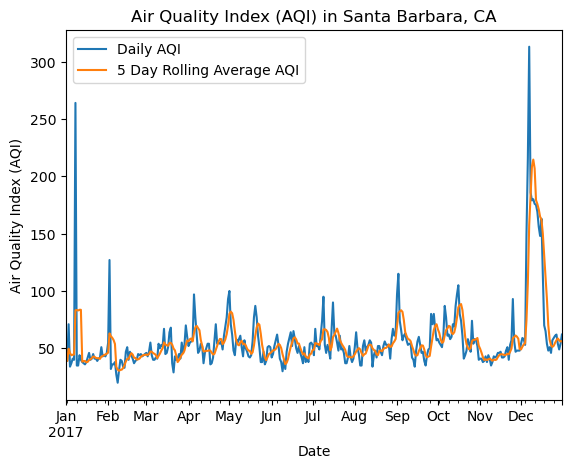

In [210]:
# Renaming column names to make it pretty for legend 
aqi_sb.rename(columns = {'aqi':'Daily AQI', 
                        'five_day_average':'5 Day Rolling Average AQI'}, inplace = True)

# Plotting 
aqi_sb.plot(y = ['Daily AQI', '5 Day Rolling Average AQI'], 
           title = "Air Quality Index (AQI) in Santa Barbara, CA", 
           xlabel = "Date",
           ylabel = "Air Quality Index (AQI)")

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

<!-- END QUESTION -->

## 11


Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).